In [1]:
# import packages 

import pandas as pd
import numpy as np
import re 
import os
import glob
from plotnine import *
import geopandas as gpd
import plotly.express as px

In [20]:
# Grab all maternal mortality data 
csv_files = glob.glob('data/raw/IHME_USA_COD_COUNTY_RACE_ETHN_2000_2019_MX_MATER_NEONAT_FEMALE/*.CSV')

# Create an empty list to store the dataframes
df_list = []

# Iterate through the CSV files, read them into dataframes, and append to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)

# Concatenate all dataframes into one
final_df = pd.concat(df_list, ignore_index=True)


In [67]:
# limit data to only counties 
# Alaska and Louisiana don't call their counties counties 
county_data = final_df[final_df.location_name.str.contains('County|Parish|(Alaska)')].copy()

/var/folders/cl/bdrh3m8j0fdfj6zm7zhhc2ch0000gn/T/ipykernel_4600/2720429757.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


In [ ]:
# filter data so that we're only pulling all races, all ages, and 2019
filter_df_total = county_data[county_data['race_name']=='Total'].copy()
filter_df_total = filter_df_total[filter_df_total['age_name']=='All Ages']
filter_df_total = filter_df_total[filter_df_total['year']==2019]

In [ ]:
# extract state name from location name 
filter_df_total['state_name'] = filter_df_total['location_name'].apply(
    lambda x: re.findall(r'\((.*?)\)', x)[0] if re.findall(r'\((.*?)\)', x) else None
)

# snake case state name 
filter_df_total['state_name'] = filter_df_total['state_name'].str.replace(' ','_') 

In [71]:
#remove nas from state_name
filter_df_total = filter_df_total[filter_df_total['state_name'].notna()]

In [ ]:
# check we have all 50 states 
filter_df_total['state_name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New_Hampshire', 'New_Jersey', 'New_Mexico',
       'New_York', 'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode_Island', 'South_Carolina',
       'South_Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West_Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [73]:
# view data to see if everything worked as expected 
filter_df_total.sample(35)

,measure_id,measure_name,location_id,location_name,fips,race_id,race_name,sex_id,sex_name,age_group_id,age_name,cause_id,cause_name,year,metric_id,metric_name,val,upper,lower,state_name
3783270,1,Deaths,1659,Warren County (Kentucky),21227.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000035,0.000046,0.000026,Kentucky
3830898,1,Deaths,1981,Prentiss County (Mississippi),28117.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000054,0.000073,0.000037,Mississippi
3783204,1,Deaths,1587,Rowan County (Kentucky),21205.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000031,0.000042,0.000021,Kentucky
3875706,1,Deaths,2399,Luna County (New Mexico),35029.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000046,0.000066,0.000029,New_Mexico
3994722,1,Deaths,3228,El Paso County (Texas),48141.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000031,0.000038,0.000025,Texas
3937260,1,Deaths,2881,Potter County (Pennsylvania),42105.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000027,0.000037,0.000018,Pennsylvania
3995466,1,Deaths,3225,Reeves County (Texas),48389.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000046,0.000066,0.000030,Texas
3845250,1,Deaths,2124,Phelps County (Missouri),29161.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000042,0.000055,0.000030,Missouri
4031958,1,Deaths,3613,Raleigh County (West Virginia),54081.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000034,0.000046,0.000025,West_Virginia
3994644,1,Deaths,3181,Dawson County (Texas),48115.0,1,Total,2,Female,22,All Ages,962,Maternal and neonatal disorders,2019,3,Rate,0.000051,0.000073,0.000033,Texas


In [74]:
# make sure there's data for every state 
filter_df_total.groupby('state_name').count()

,measure_id,measure_name,location_id,location_name,fips,race_id,race_name,sex_id,sex_name,age_group_id,age_name,cause_id,cause_name,year,metric_id,metric_name,val,upper,lower
state_name,,,,,,,,,,,,,,,,,,,
Alabama,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Alaska,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Arizona,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Arkansas,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
California,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
Colorado,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,61,61,61
Connecticut,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Delaware,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Florida,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68


In [75]:
# export to csv 
filter_df_total.to_csv('maternal_mortality_country_all_race_all_age_2019.csv')

### MMR by State data viz

This is my attempt to visualize maternal mortality by state using python. I ultimately decided to use R because I was struggling to fix the perspective on the result below and I had experience with the `us_maps` package in R that I knew worked well. That code is in `state_data_viz.Rmd`

In [ ]:
# read in state shape files 
states = gpd.read_file('data/raw/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

In [ ]:
# check to make sure all states are represented
states.NAME.unique()

array(['Maryland', 'Iowa', 'Delaware', 'Ohio', 'Pennsylvania', 'Nebraska',
       'Washington', 'Puerto Rico', 'Alabama', 'Arkansas', 'New Mexico',
       'Texas', 'California', 'Kentucky', 'Georgia', 'Wisconsin',
       'Oregon', 'Missouri', 'Virginia', 'Tennessee', 'Louisiana',
       'New York', 'Michigan', 'Idaho', 'Florida', 'Alaska', 'Illinois',
       'Montana', 'Minnesota', 'Indiana', 'Massachusetts', 'Kansas',
       'Nevada', 'Vermont', 'Connecticut', 'New Jersey',
       'District of Columbia', 'North Carolina', 'Utah', 'North Dakota',
       'South Carolina', 'Mississippi', 'Colorado', 'South Dakota',
       'Oklahoma', 'Wyoming', 'West Virginia', 'Maine', 'Hawaii',
       'New Hampshire', 'Arizona', 'Rhode Island'], dtype=object)

In [23]:
state_list=list(states.NAME.unique())

In [ ]:

final_df_2019_states = final_df_2019[final_df_2019['location_name'].isin(state_list)].copy()

In [31]:
final_df_2019_states = final_df_2019_states[final_df_2019_states['race_name']=='Total']
final_df_2019_states = final_df_2019_states[final_df_2019_states['age_name']=='All Ages']


In [27]:
#final_df_2019_states = pd.merge(final_df_2019_states, states, how = 'left', left_on = 'location_name', right_on = 'NAME') 

In [32]:
merged = states.set_index('NAME').join(final_df_2019_states.set_index('location_name'))

In [38]:
merged.reset_index(inplace=True)

In [64]:
merged.to_csv('map_state_data.csv')

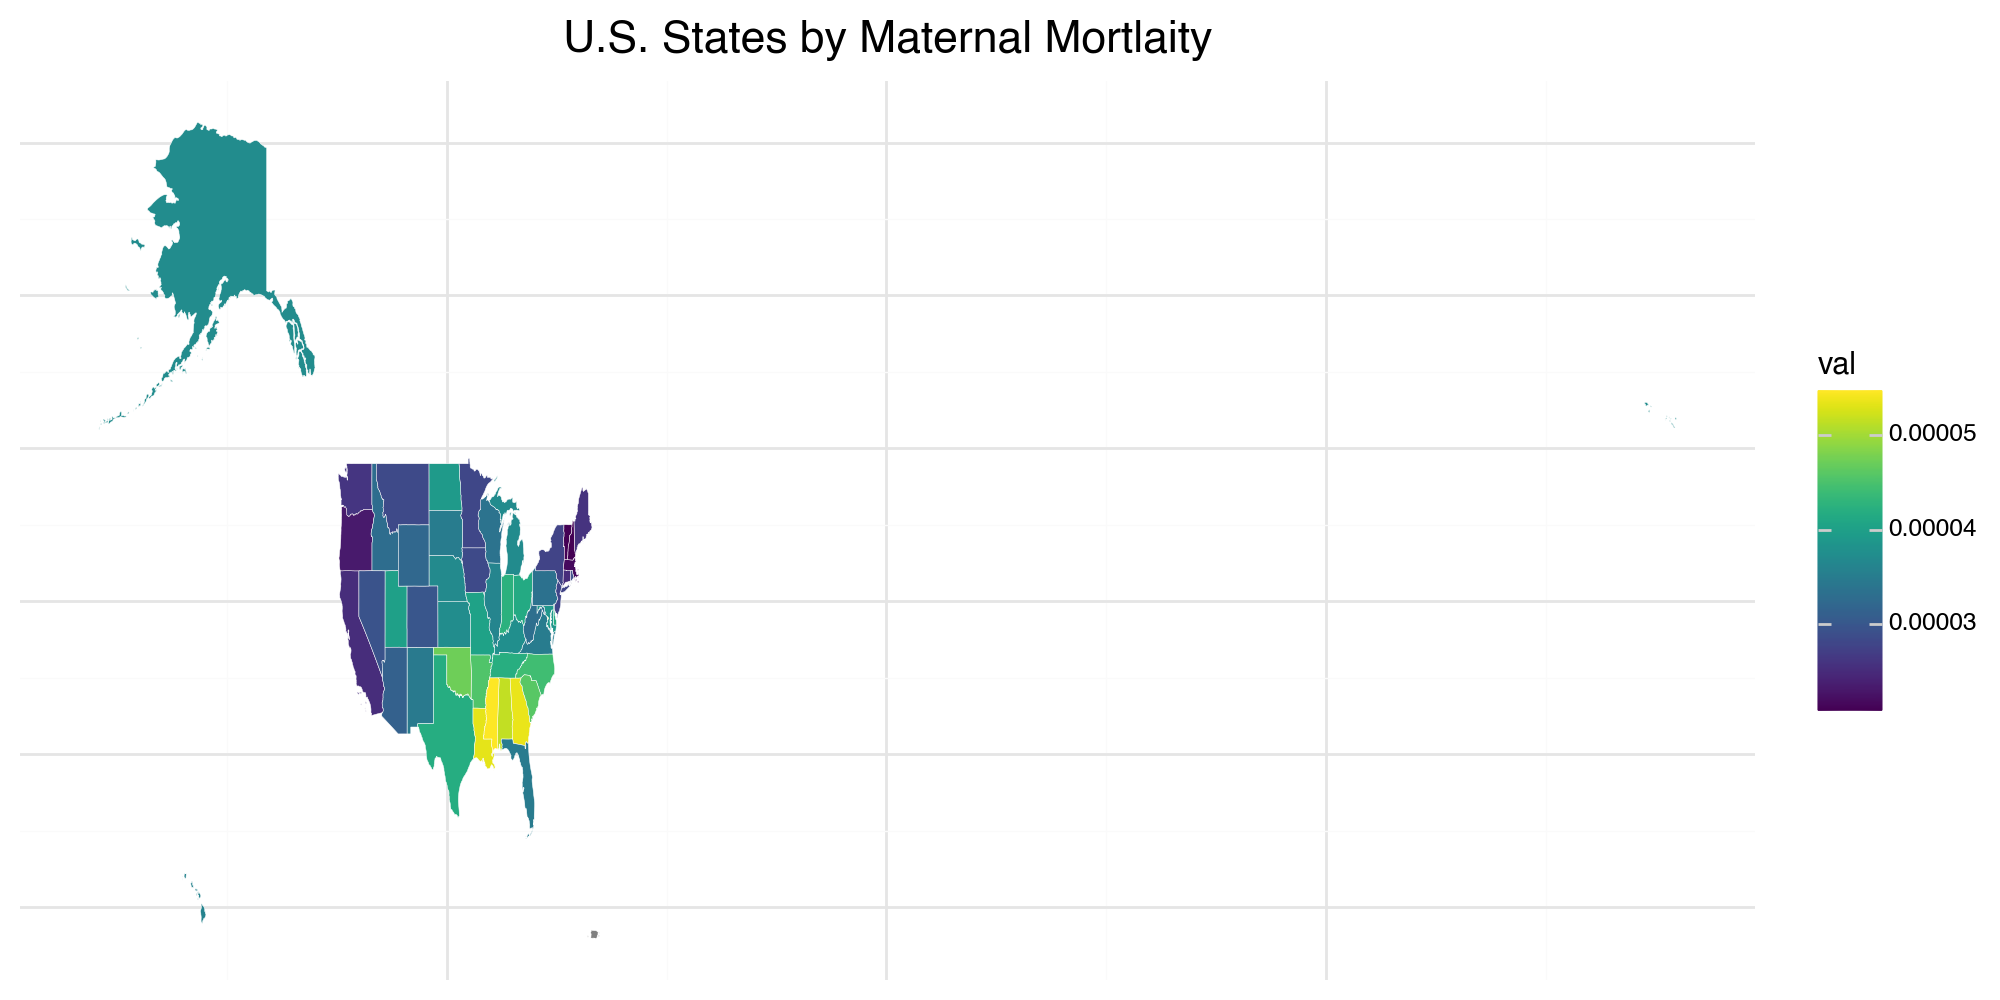

In [67]:
from plotnine import options
options.figure_size = (10, 5) 

# Plotting using plotnine
(ggplot(merged, aes(map_id='NAME', fill='val'))
        + geom_map( color='white', size=0.1)
       # + scale_fill_viridis_c(name='Maternal Mortality (2019)')  # You can choose a different color scale
        + theme_minimal()
        + labs(title='U.S. States by Maternal Mortlaity')
        #+ coord_map(projection='mercator')
        + theme(axis_text_x = element_blank(),
                axis_text_y = element_blank(),
                axis_ticks = element_blank(),
                plot_title=element_text(size=16, ha='center')))



In [ ]:
(ggplot(data=merged)+
    geom_polygon(aes(x=long, y=lat, group=group),
                color="black", fill="lightblue" ))

In [71]:
from plotnine import ggplot, aes, geom_map, theme_minimal, labs, theme, element_blank #, scale_fill_viridis_c
from plotnine.data import map_data

# Load U.S. state geometry data from plotnine's built-in dataset
us_states = plotnine.datamap_data('state')

# Prepare the data for merging: ensure consistent case for state names
data['NAME'] = data['NAME'].str.lower()  # Match the case used in map_data
us_states['region'] = us_states['region'].str.lower()

# Merge the datasets on state names
merged_data = us_states.merge(data, left_on='region', right_on='NAME', how='left')

# Plot the map
us_map_plot = (
    ggplot(merged_data, aes(map_id='region', fill='val')) +
    geom_map(aes(), map=us_states, color='white', size=0.2) +
    #scale_fill_viridis_c(name='Value') +  # Use a color scale
    theme_minimal() +
    labs(title='U.S. States by Value') +
    theme(axis_text_x=element_blank(),
          axis_text_y=element_blank(),
          axis_ticks=element_blank(),
          plot_title=theme(plot_title=element_blank()),
          aspect_ratio=0.6)  # Adjust aspect ratio as needed
)

print(us_map_plot)

ImportError: cannot import name 'map_data' from 'plotnine.data' (/opt/anaconda3/lib/python3.12/site-packages/plotnine/data/__init__.py)